In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# Load data
df = pd.read_csv('../data/Telco-Customer-Churn.csv') 



In [3]:
# Dimension of the dataset
print(df.shape)


(7043, 21)


In [4]:
# First 5 rows
print(df.head())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [12]:
# last 5 rows
print(df.tail())

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
7038              Yes         Yes         Yes  

In [13]:
# Random 5 rows
print(df.sample(5))

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
4397  7663-YJHSN  Female              0     Yes         No      72   
6724  7359-SSBJK  Female              1      No         No      64   
6578  3898-BSJYF  Female              0      No        Yes      10   
6213  8999-EXMNO  Female              0     Yes        Yes      19   
2618  1069-QJOEE    Male              0     Yes        Yes      25   

     PhoneService MultipleLines InternetService       OnlineSecurity  ...  \
4397          Yes           Yes     Fiber optic                  Yes  ...   
6724          Yes            No             DSL                  Yes  ...   
6578          Yes           Yes             DSL                  Yes  ...   
6213          Yes            No              No  No internet service  ...   
2618          Yes            No              No  No internet service  ...   

         DeviceProtection          TechSupport          StreamingTV  \
4397                  Yes                  Ye

In [14]:
# columns datatype
print(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [5]:
# Info
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [26]:
# Checking for dupplicates
# previous dimension (7043, 21)
# df = df.drop_duplicates()
# print(df.shape)

In [ ]:
# Describe
print(df.describe())



In [21]:
# Check target distribution
print(df['Churn'].value_counts())
print(df['Churn'].value_counts(normalize=True))



Churn
No     5164
Yes    1857
Name: count, dtype: int64
Churn
No     0.735508
Yes    0.264492
Name: proportion, dtype: float64


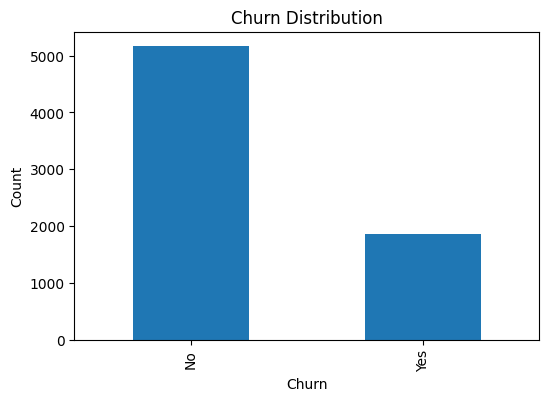

In [23]:
# Churn distribution
plt.figure(figsize=(6, 4))
df['Churn'].value_counts().plot(kind='bar')
plt.title('Churn Distribution')
plt.ylabel('Count')
plt.savefig('../images/churn_distribution.png', dpi=300, bbox_inches='tight')



d:\customer-churn-prediction-system\venv\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


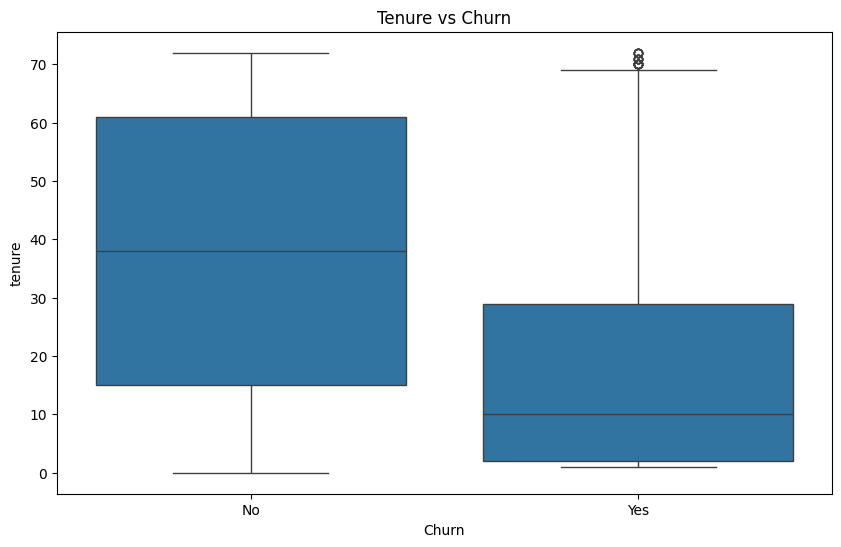

In [24]:
# Churn by tenure
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure vs Churn')
plt.savefig('../images/tenure_vs_churn.png', dpi=300, bbox_inches='tight')



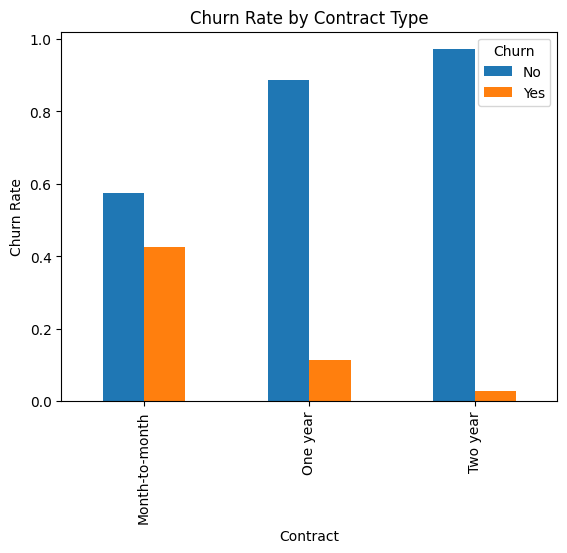

In [25]:
# Churn by contract type
pd.crosstab(df['Contract'], df['Churn'], normalize='index').plot(kind='bar')
plt.title('Churn Rate by Contract Type')
plt.ylabel('Churn Rate')
plt.savefig('../images/contract_churn.png', dpi=300, bbox_inches='tight')



In [ ]:
# Correlation heatmap
# First encode categorical variables
# df_encoded = pd.get_dummies(df, drop_first=True)
# plt.figure(figsize=(12, 10))
# sns.heatmap(df_encoded.corr(), annot=False, cmap='coolwarm')
# plt.title('Feature Correlation Heatmap')
# plt.savefig('../images/correlation_heatmap.png', dpi=300, bbox_inches='tight')